## Importing the boat's CAN BUS data


In [2]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone
from utils.plots import plot_events_data

# %matplotlib widget

from utils import plot_styles

# plt.rcParams.update({
#     'figure.dpi' : 240,
#     'savefig.format' : 'pdf',
#     #
#     'text.usetex' : True,
#     'text.latex.preamble' : "\\usepackage{icomma}",
#     'figure.figsize' : plot_styles.get_figsize(columnwidth=455.0, unit='pt', hf_abs=),
#     #
#     "axes.labelsize": 12,
#     "font.size": 12,
#     "legend.fontsize": 12,
#     "xtick.labelsize": 12,
#     "ytick.labelsize": 12,
# })

input_path = "/home/joaoantoniocardoso/ZeniteSolar/2022/Strategy22/datasets/can/final/"
# input_filename = "unified_monotonic_data_1s.hdf5"
input_filename = "unified_monotonic_data_1s_with_gps.hdf5"
df = vaex.open(input_path + input_filename).to_pandas_df()

# Localize the timestamp
tzinfo = timezone("America/Sao_Paulo")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_localize(timezone("UTC"))
df["timestamp"] = df["timestamp"].dt.tz_convert(tzinfo)
df["timestamp"]
df


,timestamp,MSWI19__MCS__SIGNATURE,MSWI19__MCS__BOAT_ON,MSC19_5__ADC__SIGNATURE,MSC19_5__ADC__AVG,MSC19_5__ADC__MIN,MSC19_5__ADC__MAX,MAM19__MOTOR__SIGNATURE,MAM19__MOTOR__D,MAM19__MOTOR__I,...,solcast_poa,solcast_energy,solcast_timestamp,gps_latitude,gps_longitude,gps_altitude,gps_speed,gps_heading,gps_distance,gps_timestamp
0,2022-03-15 20:50:23-03:00,241.0,1.0,254.0,0.0,0.320068,0.320068,190.0,0.0,0.0,...,NaN,NaN,2022-03-15 23:50:23,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15 23:50:23
1,2022-03-15 20:50:24-03:00,241.0,1.0,254.0,0.0,0.320068,0.320068,190.0,0.0,0.0,...,NaN,NaN,2022-03-15 23:50:24,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15 23:50:24
2,2022-03-15 20:50:25-03:00,241.0,1.0,254.0,0.0,0.320068,0.320068,190.0,0.0,0.0,...,NaN,NaN,2022-03-15 23:50:25,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15 23:50:25
3,2022-03-15 20:50:26-03:00,241.0,1.0,254.0,0.0,0.320068,0.320068,190.0,0.0,0.0,...,NaN,NaN,2022-03-15 23:50:26,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15 23:50:26
4,2022-03-15 20:50:27-03:00,241.0,1.0,254.0,0.0,0.320068,0.320068,190.0,0.0,0.0,...,NaN,NaN,2022-03-15 23:50:27,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-15 23:50:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248889,2022-03-18 17:58:32-03:00,241.0,1.0,254.0,0.0,0.310059,0.310059,190.0,0.0,0.0,...,8.095038,20943.239176,2022-03-18 20:58:32,-22.922297,-43.09554,10.0,0.839032,85.292245,29.753473,2022-03-18 20:58:32
248890,2022-03-18 17:58:33-03:00,241.0,1.0,254.0,0.0,0.310059,0.310059,190.0,0.0,0.0,...,8.095038,20943.239176,2022-03-18 20:58:33,-22.922297,-43.09554,10.0,0.839032,85.292245,29.753473,2022-03-18 20:58:33
248891,2022-03-18 17:58:34-03:00,241.0,1.0,254.0,0.0,0.310059,0.310059,190.0,0.0,0.0,...,8.095038,20943.239176,2022-03-18 20:58:34,-22.922297,-43.09554,10.0,0.839032,85.292245,29.753473,2022-03-18 20:58:34
248892,2022-03-18 17:58:35-03:00,241.0,1.0,254.0,0.0,0.310059,0.310059,190.0,0.0,0.0,...,8.095038,20943.239176,2022-03-18 20:58:35,-22.922297,-43.09554,10.0,0.839032,85.292245,29.753473,2022-03-18 20:58:35


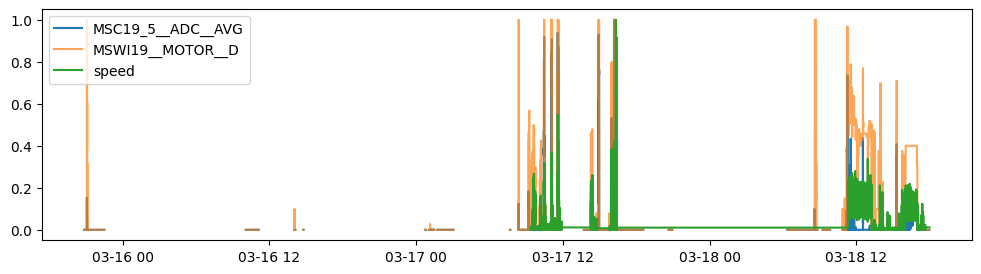

In [3]:
# Visually checking the alignment of the data

plt.figure(figsize=(12, 3))
plt.plot(
    df["timestamp"],
    df["MSC19_5__ADC__AVG"] / df["MSC19_5__ADC__AVG"].max(),
    label="MSC19_5__ADC__AVG",
)
plt.plot(df["timestamp"], df["MSWI19__MOTOR__D"], label="MSWI19__MOTOR__D", alpha=0.7)
plt.plot(df["timestamp"], df["gps_speed"] / df["gps_speed"].max(), label="speed")
plt.legend()
plt.show()


## Transforming the boat's CAN data into boat's circuit data


In [4]:
[print(c) for c in sorted(df.columns)][0]


MAB19__STATE__ERROR
MAB19__STATE__SIGNATURE
MAB19__STATE__STATE
MAC22__CONTACTOR__RESPONSE
MAC22__CONTACTOR__SIGNATURE
MAC22__STATE__ERROR
MAC22__STATE__SIGNATURE
MAC22__STATE__STATE
MAM19__CONTACTOR__REQUEST
MAM19__CONTACTOR__SIGNATURE
MAM19__MOTOR__D
MAM19__MOTOR__I
MAM19__MOTOR__SIGNATURE
MAM19__STATE__ERROR
MAM19__STATE__SIGNATURE
MAM19__STATE__STATE
MCB19_1__MEASUREMENTS__DT
MCB19_1__MEASUREMENTS__INPUT_VOLTAGE
MCB19_1__MEASUREMENTS__OUTPUT_CURRENT
MCB19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_1__MEASUREMENTS__SIGNATURE
MCB19_1__STATE__CONTROL
MCB19_1__STATE__SIGNATURE
MCB19_1__STATE__STATE
MCB19_2__MEASUREMENTS__DT
MCB19_2__MEASUREMENTS__INPUT_VOLTAGE
MCB19_2__MEASUREMENTS__OUTPUT_CURRENT
MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_2__MEASUREMENTS__SIGNATURE
MCB19_2__STATE__CONTROL
MCB19_2__STATE__SIGNATURE
MCB19_2__STATE__STATE
MCC19_1__MEASUREMENTS__DT
MCC19_1__MEASUREMENTS__INPUT_CURRENT
MCC19_1__MEASUREMENTS__INPUT_VOLTAGE
MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_1__MEASUREM

In [5]:
def print_only_interesting_system_variables_from_columns(df):
    for c in sorted(df.columns):
        ignored = [
            "MIN",
            "MAX",
            "STATE",
            "ERROR",
            "SIGNATURE",
            "MCS19",
            "MAB19",
            "PUMPS",
            "solcast",
            "gps",
        ]
        if any(x in c for x in ignored):
            continue
        print(tuple(c.split("__")))


print_only_interesting_system_variables_from_columns(df)


('MAC22', 'CONTACTOR', 'RESPONSE')
('MAM19', 'CONTACTOR', 'REQUEST')
('MAM19', 'MOTOR', 'D')
('MAM19', 'MOTOR', 'I')
('MCB19_1', 'MEASUREMENTS', 'DT')
('MCB19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCB19_1', 'MEASUREMENTS', 'OUTPUT_CURRENT')
('MCB19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCB19_2', 'MEASUREMENTS', 'DT')
('MCB19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCB19_2', 'MEASUREMENTS', 'OUTPUT_CURRENT')
('MCB19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_1', 'MEASUREMENTS', 'DT')
('MCC19_1', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_1', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_1', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_2', 'MEASUREMENTS', 'DT')
('MCC19_2', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_2', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_2', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_3', 'MEASUREMENTS', 'DT')
('MCC19_3', 'MEASUREMENTS', 'INPUT_CURRENT')
('MCC19_3', 'MEASUREMENTS', 'INPUT_VOLTAGE')
('MCC19_3', 'MEASUREMENTS', 'OUTPUT_VOLTAGE')
('MCC19_4', 'MEASUREMENTS', 'DT

### Selecting the data of interest


In [6]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
number_of_mppts = 4
number_of_battery_cells = 3
number_of_mcbs = 2
system_data = {
    "Battery Pack Voltage": col("MCS19", "BAT", "AVG"),
    "Battery Cell Voltage": [
        col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    ],
    # "Battery Input Current": col("MSC19_4", "ADC", "AVG"),  // This module was not installed during this competition
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "ESC Duty Cycle": col("MSWI19", "MOTOR", "D"),
    "ESC Motor On": col("MIC19", "MOTOR", "MOTOR"),
    "ESC Boat On": col("MIC19", "MCS", "BOAT_ON"),
    "Motor RPM": col("MT19", "RPM", "AVG"),
    "MPPT Input Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mppts)
    ],
    "MCB Input Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Voltage": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mcbs)
    ],
    "MCB Output Current": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "OUTPUT_CURRENT")
        for i in range(number_of_mcbs)
    ],
    "MCB Duty Cycle": [
        col(f"MCB19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mcbs)
    ],
}
system_data


{'Battery Pack Voltage': 'MCS19__BAT__AVG',
 'Battery Cell Voltage': ['MSC19_1__ADC__AVG',
  'MSC19_2__ADC__AVG',
  'MSC19_3__ADC__AVG'],
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'ESC Duty Cycle': 'MSWI19__MOTOR__D',
 'ESC Motor On': 'MIC19__MOTOR__MOTOR',
 'ESC Boat On': 'MIC19__MCS__BOAT_ON',
 'Motor RPM': 'MT19__RPM__AVG',
 'MPPT Input Voltage': ['MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE'],
 'MPPT Output Voltage': ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'MPPT Input Current': ['MCC19_1__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_2__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_4__MEASUREMENTS__INPUT_CURRENT'],
 'MPPT Output Current': ['MCC19_1__MEASUREMENTS__OUTPUT_CURRENT',
  'MCC19_2__MEASUREM

In [7]:
plt.rcdefaults()

# # Set the style globally
# plt.style.use("seaborn-v0_8-white")

# plt.rcParams["font.size"] = 10
# plt.rcParams["axes.labelsize"] = 10
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 8
# plt.rcParams["xtick.labelsize"] = 8
# plt.rcParams["ytick.labelsize"] = 8
# plt.rcParams["legend.fontsize"] = 10
# plt.rcParams["figure.titlesize"] = 12
# plt.rcParams["axes.formatter.useoffset"] = False
# plt.rcParams["text.usetex"] = True

figwidth, figheight = plt.figaspect(0.5 / 1.68)  # type: ignore

events = [
    {
        "name": "Classificação Match Race",
        "start": Timestamp(
            year=2022, month=3, day=17, hour=9, minute=30, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=17, hour=9, minute=50, second=00, tzinfo=tzinfo
        ),
        "gps_file": "match_a.gpx",
    },
    {
        "name": "Match Race",
        "start": Timestamp(
            year=2022, month=3, day=17, hour=14, minute=00, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=17, hour=14, minute=20, second=00, tzinfo=tzinfo
        ),
        "gps_file": "match_b.gpx",
    },
    {
        "name": "Prova Longa - 5h",
        "start": Timestamp(
            year=2022, month=3, day=18, hour=11, minute=10, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=18, hour=16, minute=55, second=00, tzinfo=tzinfo
        ),
        "gps_file": "longa.gpx",
    },
    {
        "name": "Revezamento - 3h",
        "start": Timestamp(
            year=2022, month=3, day=19, hour=9, minute=30, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=19, hour=12, minute=30, second=00, tzinfo=tzinfo
        ),
        "gps_file": "revezamento.gpx",
    },
    {
        "name": "Prova Curta - 2h",
        "start": Timestamp(
            year=2022, month=3, day=20, hour=9, minute=30, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=20, hour=11, minute=30, second=00, tzinfo=tzinfo
        ),
        "gps_file": "curta_e_abertura.gpx",
    },
    {
        "name": "Prova Rápida - 1h",
        "start": Timestamp(
            year=2022, month=3, day=21, hour=9, minute=30, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=21, hour=10, minute=30, second=00, tzinfo=tzinfo
        ),
        "gps_file": "curta_e_abertura.gpx",
    },
    {
        "name": "Sprint",
        "start": Timestamp(
            year=2022, month=3, day=22, hour=11, minute=00, second=00, tzinfo=tzinfo
        ),
        "end": Timestamp(
            year=2022, month=3, day=22, hour=11, minute=5, second=00, tzinfo=tzinfo
        ),
        "gps_file": "sprint.gpx",
    },
]

events = events[:3]  # Remove events for which we don't have data


In [8]:
def check_bit(df, bit):
    x = df.to_numpy().astype("uint8")
    return ((x) & (1 << bit)) >= 0.5


In [9]:
df["boat_on"] = check_bit(df[system_data["ESC Boat On"]], bit=0)
# df['mppts_on'] = check_bit(df[system_data['MPPT On']], bit=0)
df["dms_on"] = check_bit(df[system_data["ESC Motor On"]], bit=1)
df["motor_on"] = check_bit(df[system_data["ESC Motor On"]], bit=0)


# Battery Voltage
if True:
    for i in range(len(system_data["Battery Cell Voltage"])):
        df[f"bat{i + 1}_v"] = df[system_data["Battery Cell Voltage"][i]]
    df["batt_v"] = df["esc_vi"] = df["mppt_v_out"] = (
        df["bat1_v"] + df["bat2_v"] + df["bat3_v"]
    )


# Use MPPT model to compute its output power
if True:

    def mppt_eta(mppt_p_in: np.float64) -> np.float64:
        return np.float64(0.92)

    df["mppt_p_in"] = np.zeros(len(df))
    for i in range(len(system_data["MPPT Output Voltage"])):
        df[f"mppt{i + 1}_v_in"] = df[system_data["MPPT Input Voltage"][i]]
        df[f"mppt{i + 1}_v_out"] = df[system_data["MPPT Output Voltage"][i]]
        df[f"mppt{i + 1}_i_in"] = (
            df[system_data["MPPT Input Current"][i]] * 0.1
        )  # Fix wrong scale
        df[f"mppt{i + 1}_dt"] = df[system_data["MPPT Duty Cycle"][i]]

        df[f"mppt{i + 1}_p_in"] = df[f"mppt{i + 1}_i_in"] * df[f"mppt{i + 1}_v_in"]

        df["mppt_p_in"] = df["mppt_p_in"] + df[f"mppt{i + 1}_p_in"]
    df["mppt_p_out"] = df["mppt_p_in"] * mppt_eta(
        df["mppt_p_in"].to_numpy()
    )  # model-based data
    df["mppt_i_out"] = (
        df["mppt_p_out"] / df["mppt_v_out"]
    )  # This division is safe because mppt output voltage is far from zero


# From the node analysis, compute currents and powers
if True:
    df["batt_io"] = df[system_data["Battery Output Current"]]
    # df['batt_ii'] = df[system_data["Battery Input Current"]]
    # df['batt_i'] = df['batt_io'] - df['batt_ii']  # model-based data
    # df["esc_i_in"] = df["batt_i"] + df["mppt_i_out"]  # model-based data
    df["batt_po"] = df["batt_v"] * df["batt_io"]  # sensor-based data
    # df["batt_pi"] = df["batt_v"] * df["batt_ii"]  # model-based data


# Compute ESC powers
if True:

    def esc_eta(esc_p_in: np.float64) -> np.float64:
        return np.float64(0.8)

    df["esc_dt"] = df[system_data["ESC Duty Cycle"]]
    # df["esc_p_in"] = df["esc_vi"] * df["esc_i_in"]  # model-based data
    # df["esc_p_out"] = df["motor_p_in"] = df["esc_p_in"] * esc_eta(
    #     df["esc_p_in"].to_numpy()
    # )  # model-based data **2


# Use motor parameters to compute its outputs
if True:

    def motor_eta(x, a=1.27443456, b=-280.17188206):
        # 'x' is the input power of the motor, we are linearizing it here
        # Clipping because zero is a pole for this model
        P_E = (a * x + b).clip(min=0.1)

        # Parameters from the optimized model
        R_A = 0.03079777
        B_M = 9.3300e-04
        K_T = 0.10390329

        # Voltage is fixated to 36V for this simplified model
        V_A = 36

        # eta function broken into parts to be easier to digest
        i_a = P_E / V_A
        eta_p1 = -(B_M * R_A**2 * i_a) / (K_T**2 * V_A)
        eta_p2 = 2 * B_M * R_A / K_T**2
        eta_p3 = -(B_M * V_A) / (K_T**2 * i_a)
        eta_p4 = -(R_A * i_a) / V_A
        eta = 1 + eta_p1 + eta_p2 + eta_p3 + eta_p4

        # Efficiency can never be below 0 of above 1
        return eta.clip(min=0, max=1)

    motor_params = {
        "K_T": 0.10390329,
    }
    df["motor_rpm"] = df["trans_rpmi"] = df[system_data["Motor RPM"]]
    # df["motor_p_out"] = df["trans_p_in"] = df["motor_p_in"] * motor_eta(
    #     df["motor_p_in"].to_numpy()
    # )
    rpm_to_rps = 2 * np.pi / 60
    # df['motor_torq'] = df['motor_p_out'] / (df['motor_rpm'] * rpm_to_rps)  # Invalid because of data inconsistency
    # df['motor_ii'] = df['esc_i_out'] = df['motor_torq'] / motor_params['K_T']  # invalid too

# Compute transmission
if True:

    def transmission_eff(input_power: np.float64):
        return 0.8

    transmission_params = {
        "ratio": 1 / 1.6,
    }
    df["trans_rpmo"] = df["prop_rpm"] = df["trans_rpmi"] * transmission_params["ratio"]
    # df["trans_p_out"] = df["prop_p_in"] = df["trans_p_in"] * transmission_eff(
    #     df["trans_p_in"].to_numpy()
    # )
    # df["trans_torqo"] = df["prop_torq"] = df["trans_p_out"] / (
    #     df["trans_rpmo"] * rpm_to_rps
    # )
    # df['trans_torqi'] = df['motor_torq'] = df["trans_torqo"] / transmission_eff(
    #     df["trans_p_in"].to_numpy()
    # )

# Compute theoretical propeller (https://ittc.info/media/1203/75-01-02-01.pdf)
if True:
    prop_params = {
        "pitch": 13,  # inches
        "diameter": 11,  # inches
    }
    # inches_to_m = 2.54e-2
    inches_to_km = 2.54e-5
    rpm_to_rph = 60
    # rho_water = 997 # density in kg/m³
    # prop_disc_area = np.pi * prop_params['diameter']**2 / 4
    # Power loading coefficient for ship speed
    # Cps = df['prop_p_in'] / ( 0.5 * rho_water * df['boat_speed']**3 * prop_disc_area )
    # Theoretical boat speed
    # V = w * pitch
    ideal_prop_speed = (df["prop_rpm"] * rpm_to_rph) * (
        prop_params["pitch"] * inches_to_km
    )  # Theoretical 100% efficiency boat speed in km


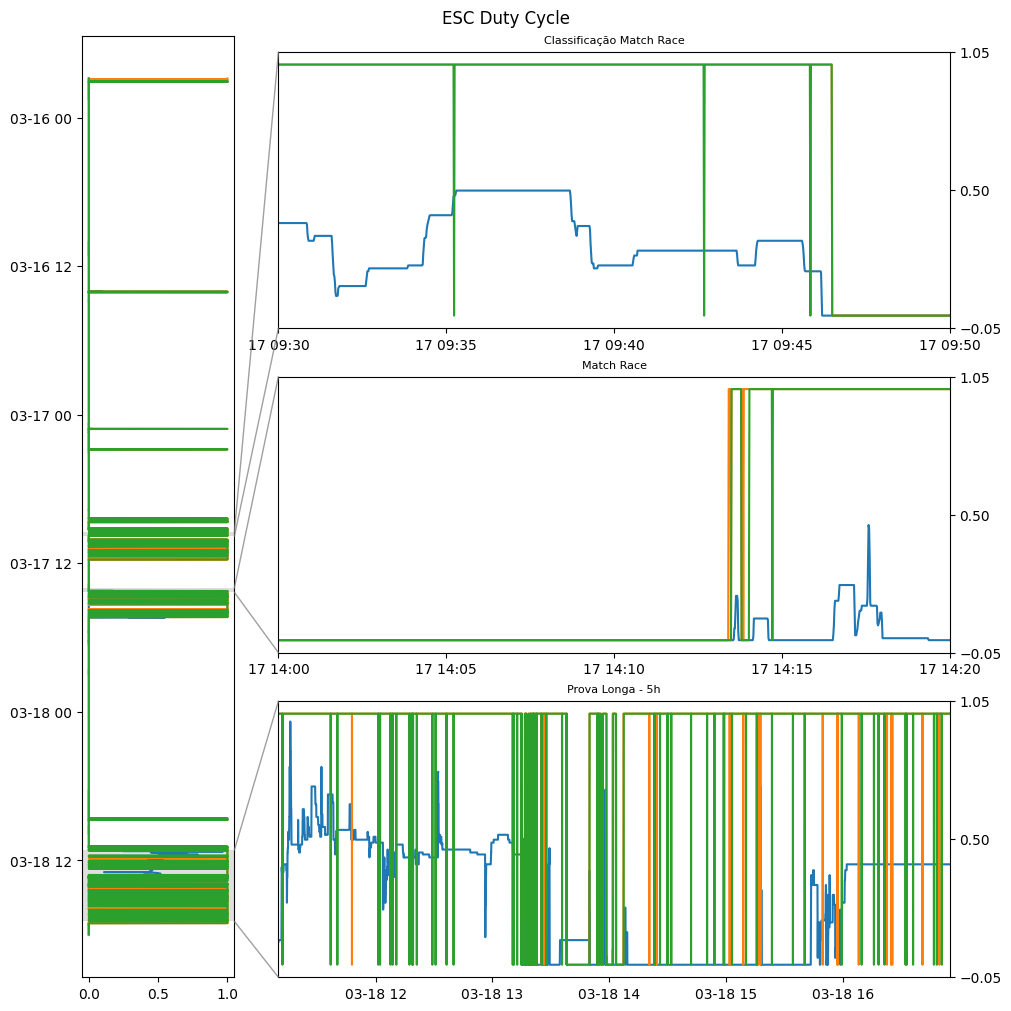

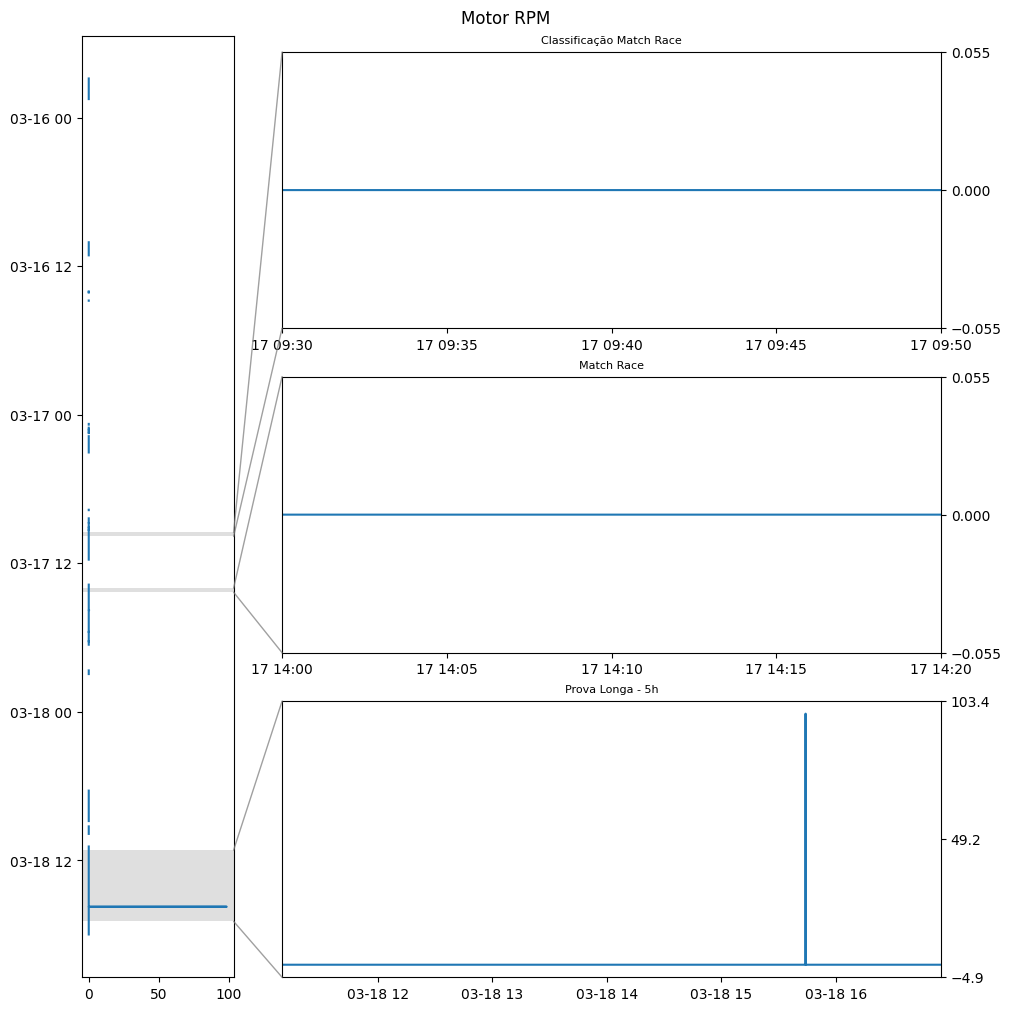

In [10]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["esc_dt", "boat_on", "motor_on"],
    "ESC Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["motor_rpm"],
    "Motor RPM",
)

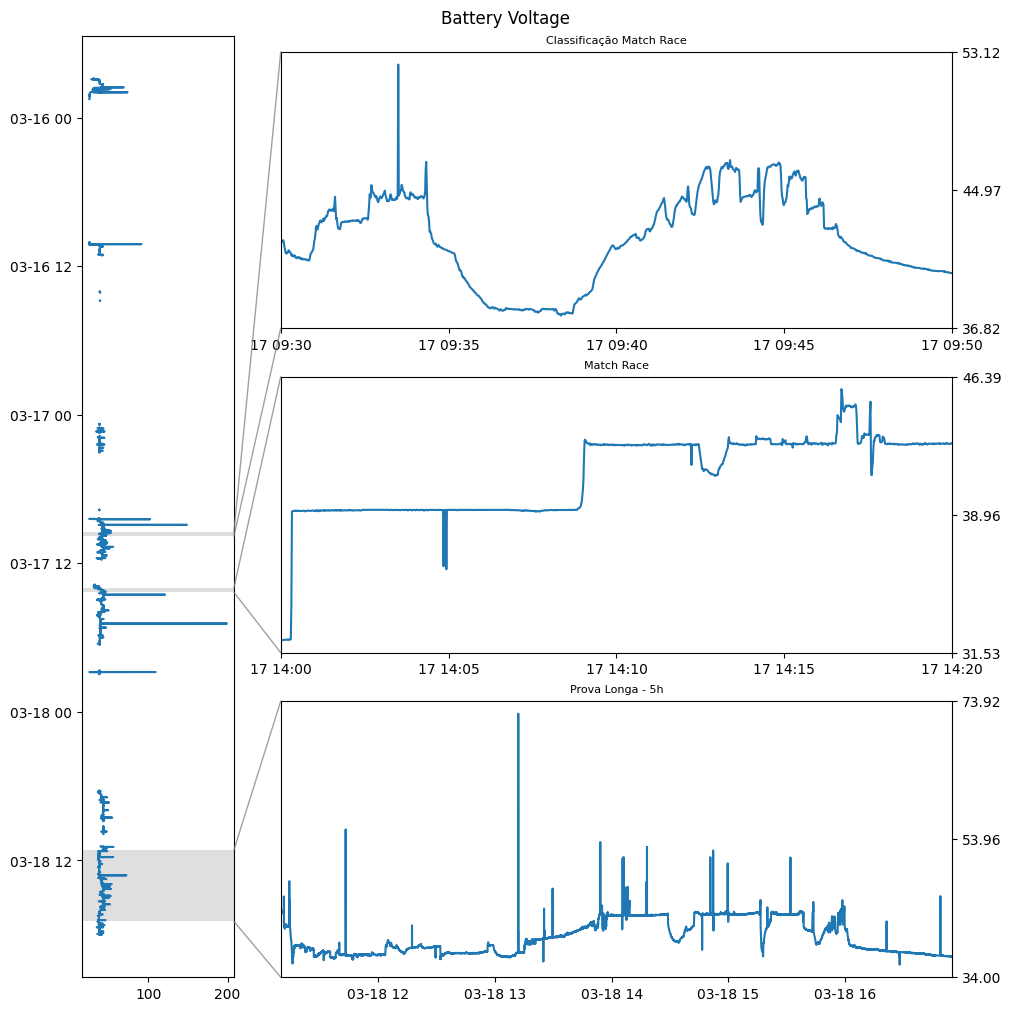

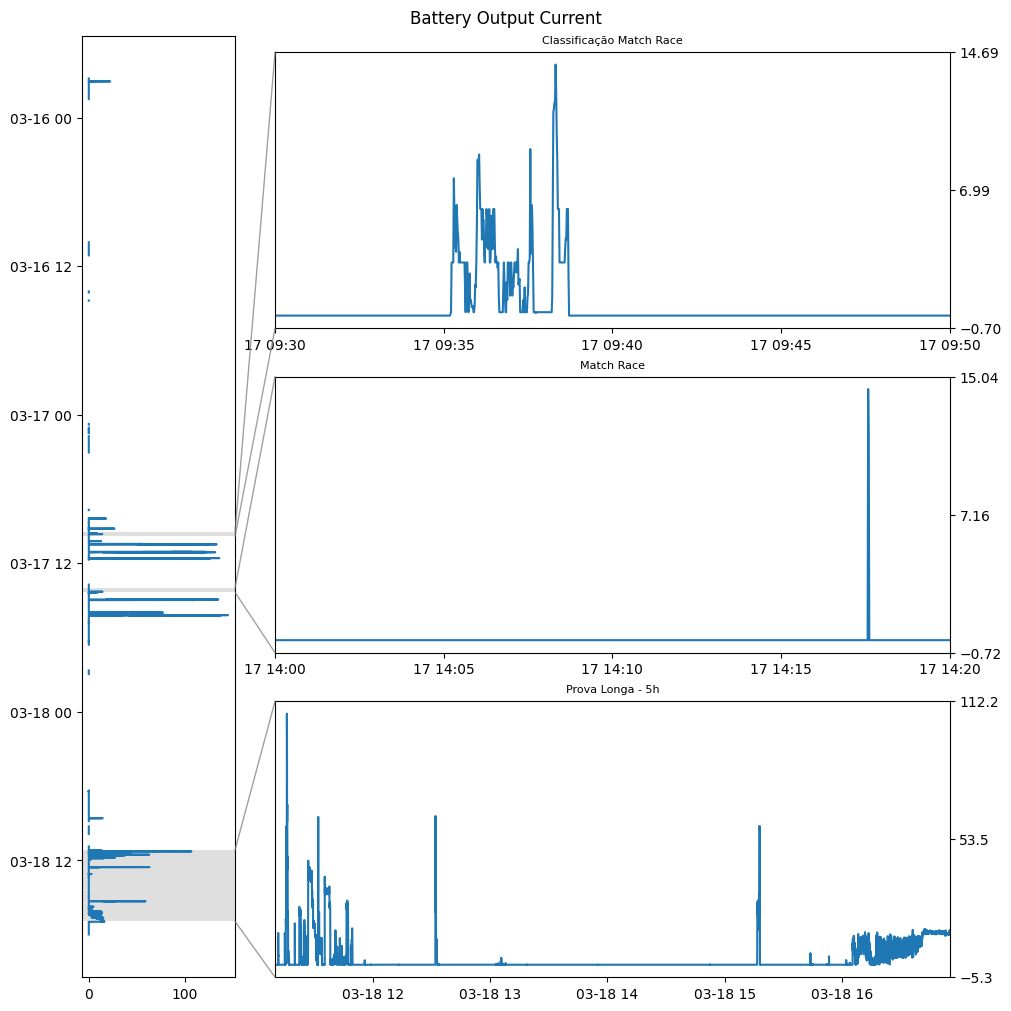

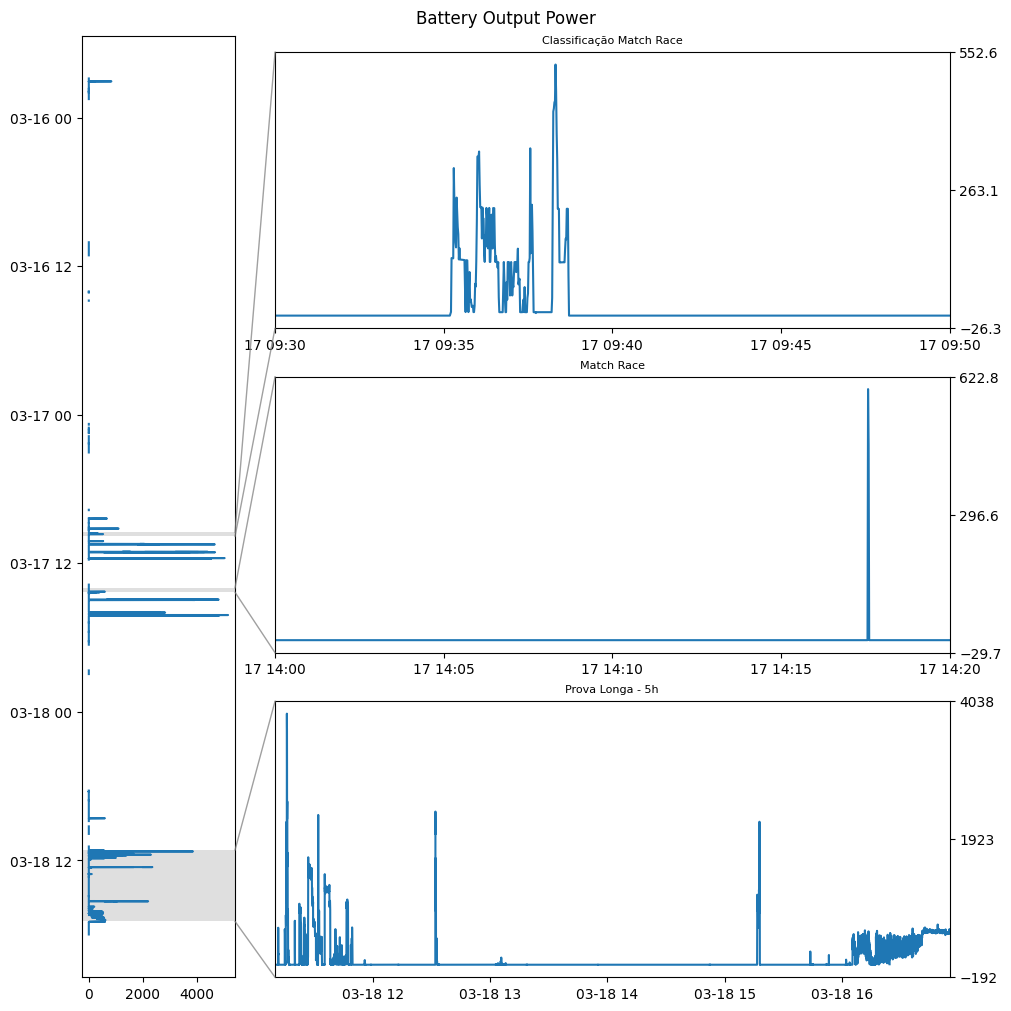

In [11]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["batt_v"],
    "Battery Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["batt_io"],
    "Battery Output Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["batt_po"],
    "Battery Output Power",
)
plt.show()


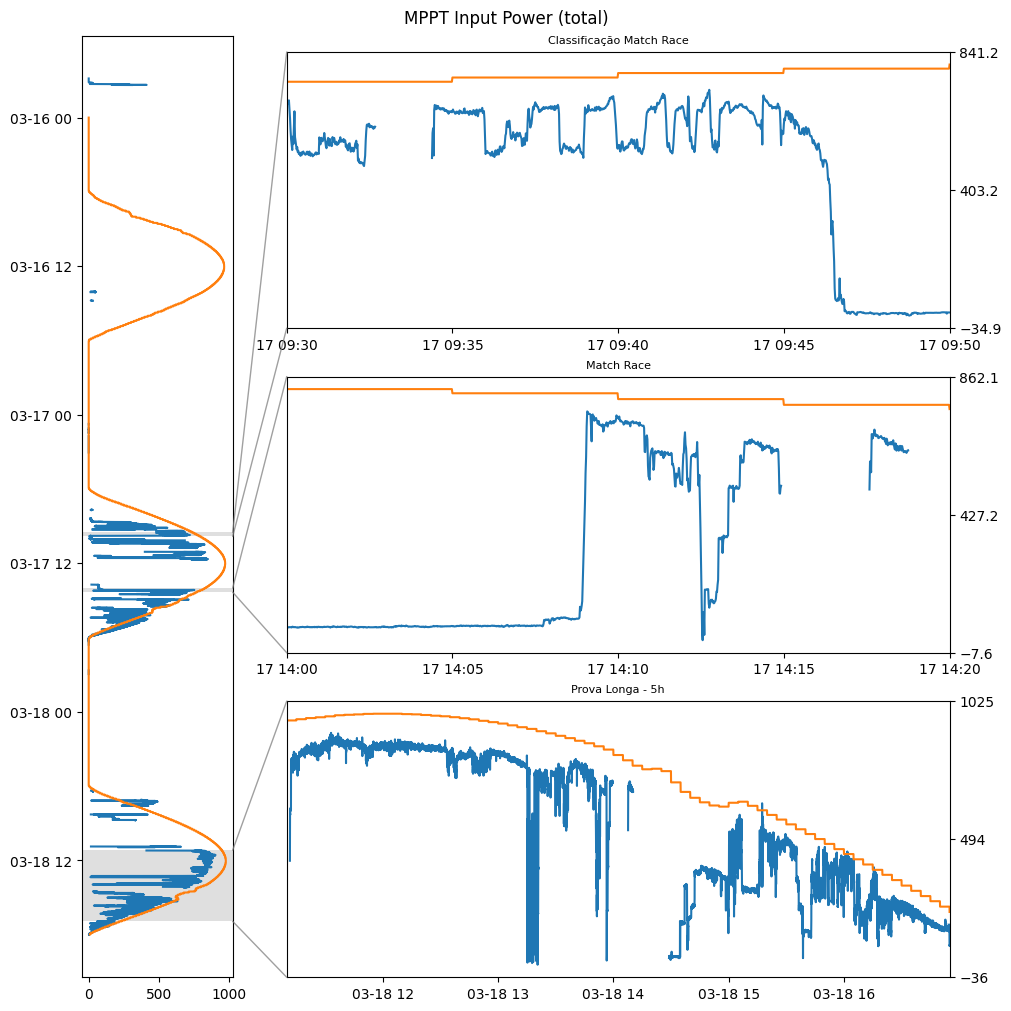

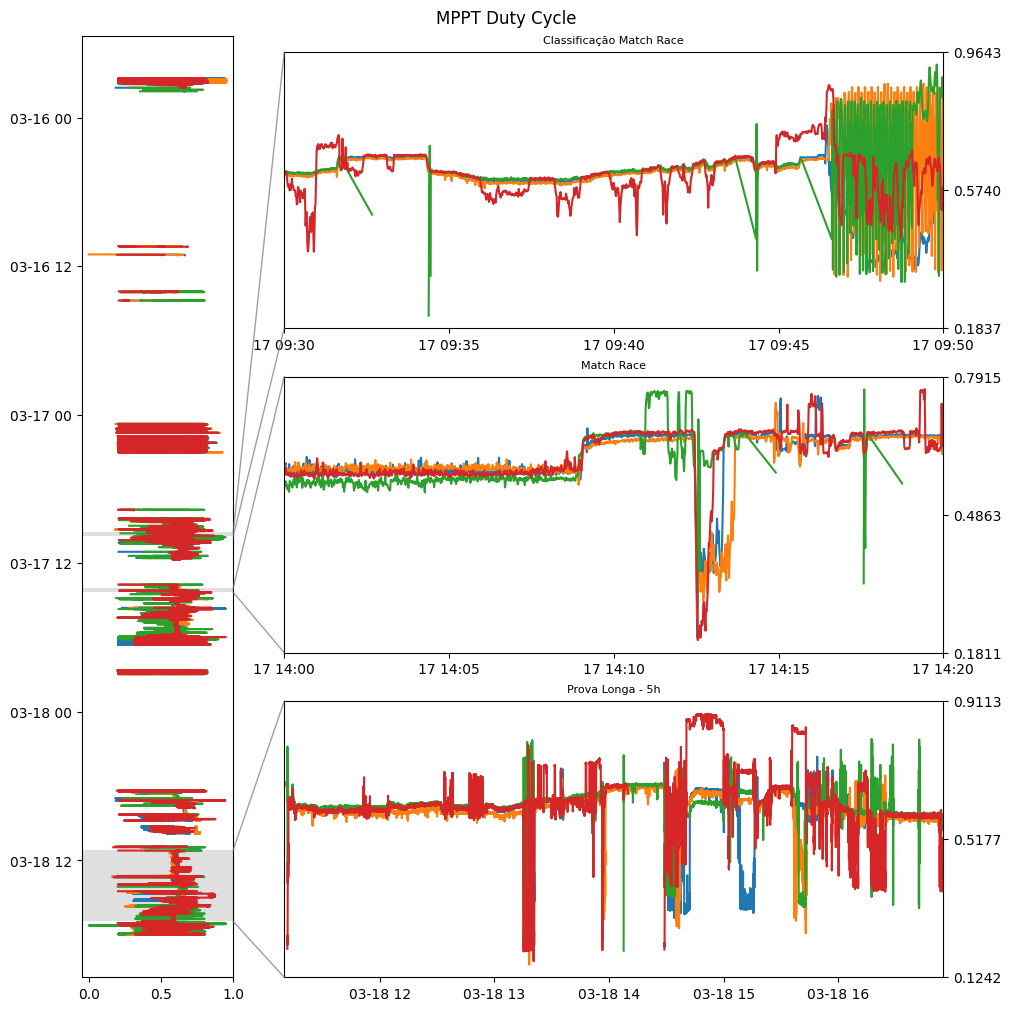

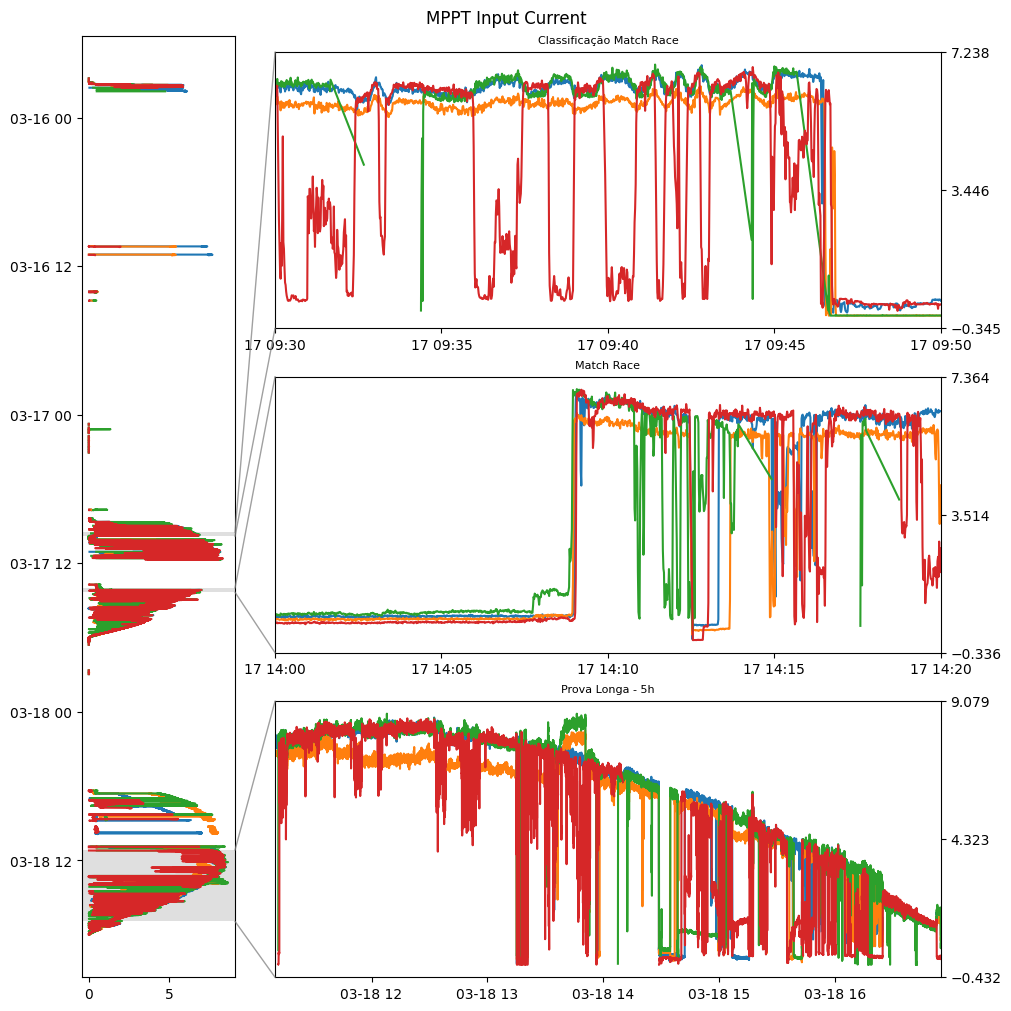

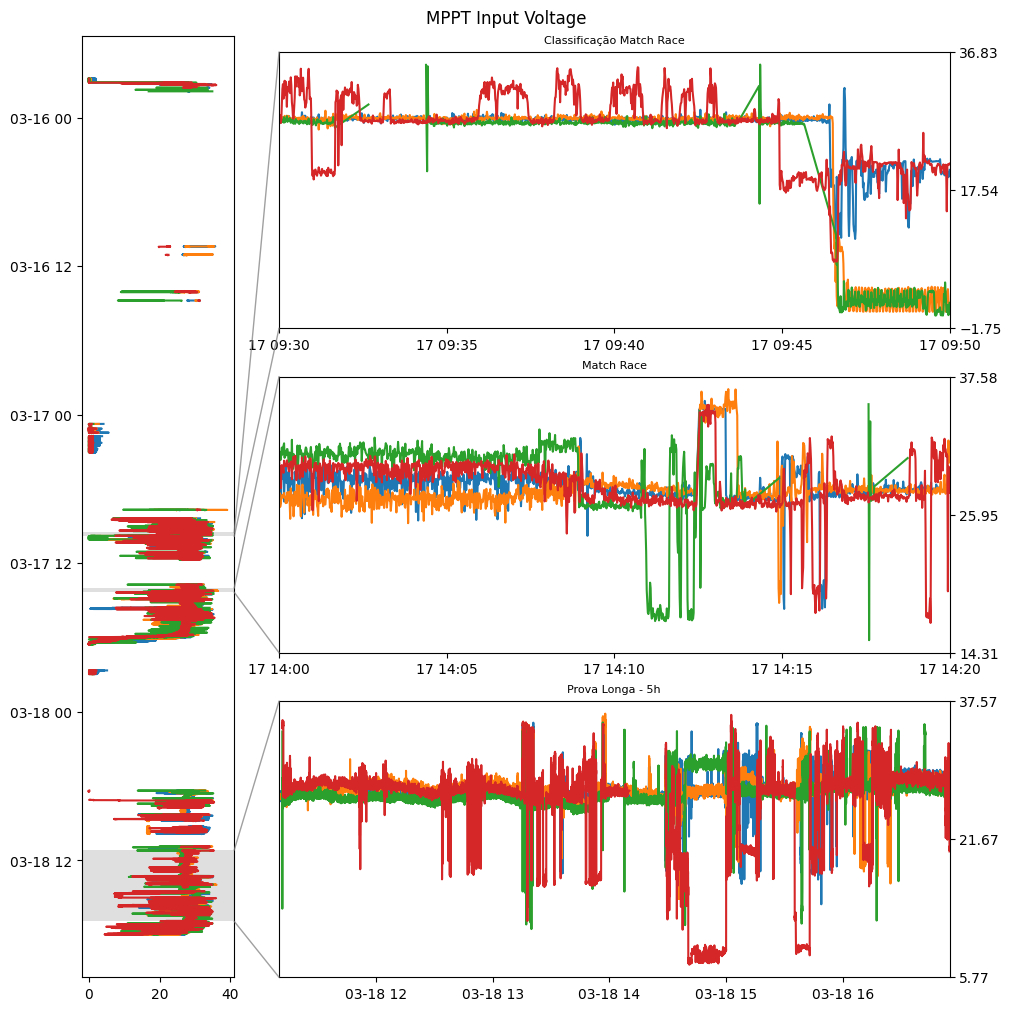

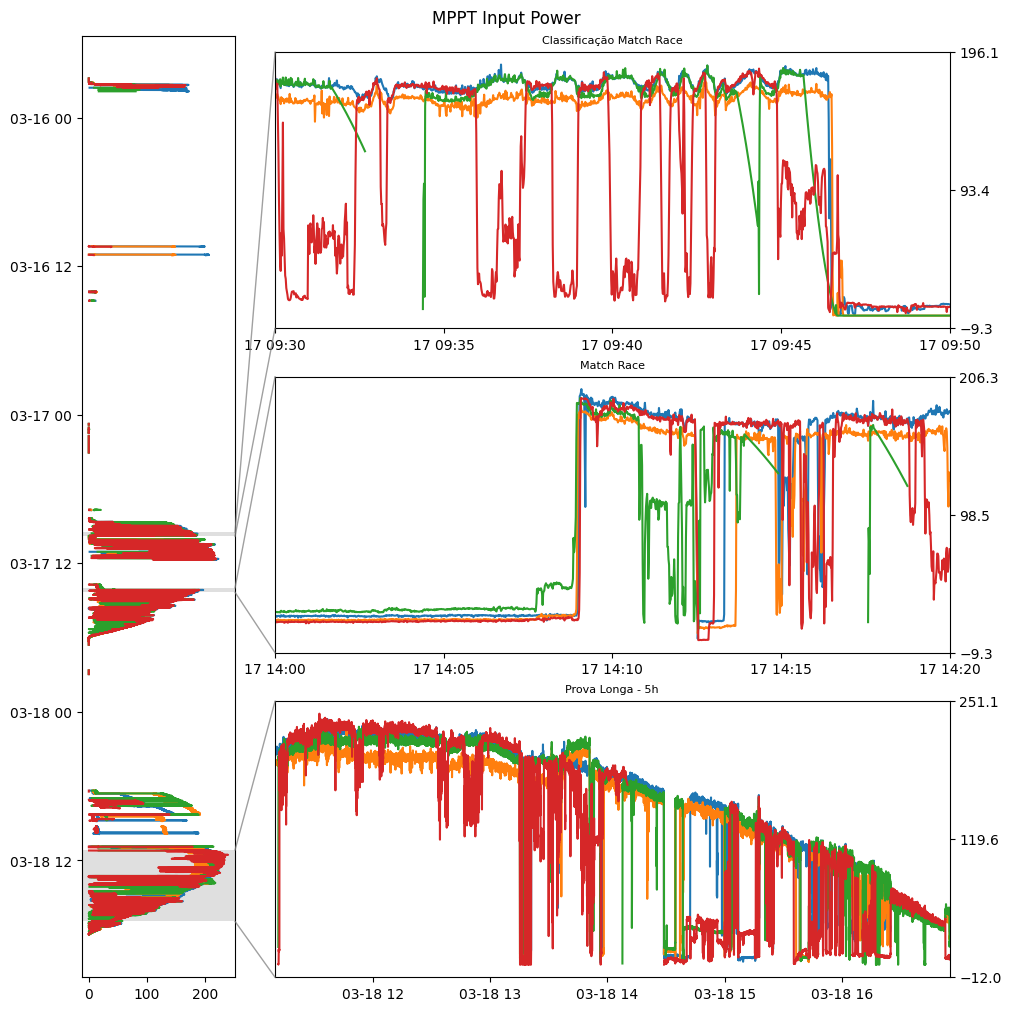

In [12]:
plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt_p_in", "solcast_poa"],
    "MPPT Input Power (total)",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_dt", "mppt2_dt", "mppt3_dt", "mppt4_dt"],
    "MPPT Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_ii", "mppt2_ii", "mppt3_ii", "mppt4_ii"],
    "MPPT Input Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_vi", "mppt2_vi", "mppt3_vi", "mppt4_vi"],
    "MPPT Input Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mppt1_pi", "mppt2_pi", "mppt3_pi", "mppt4_pi"],
    "MPPT Input Power",
)
plt.show()


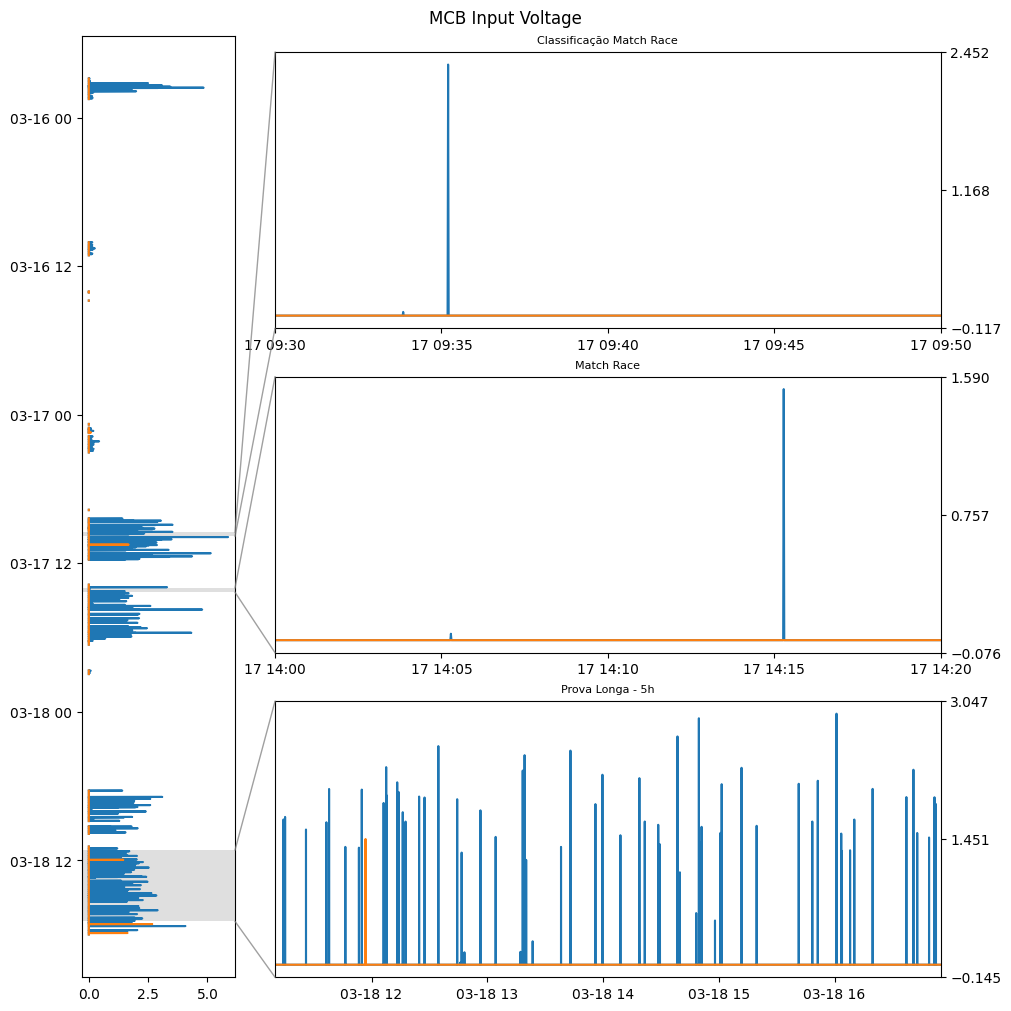

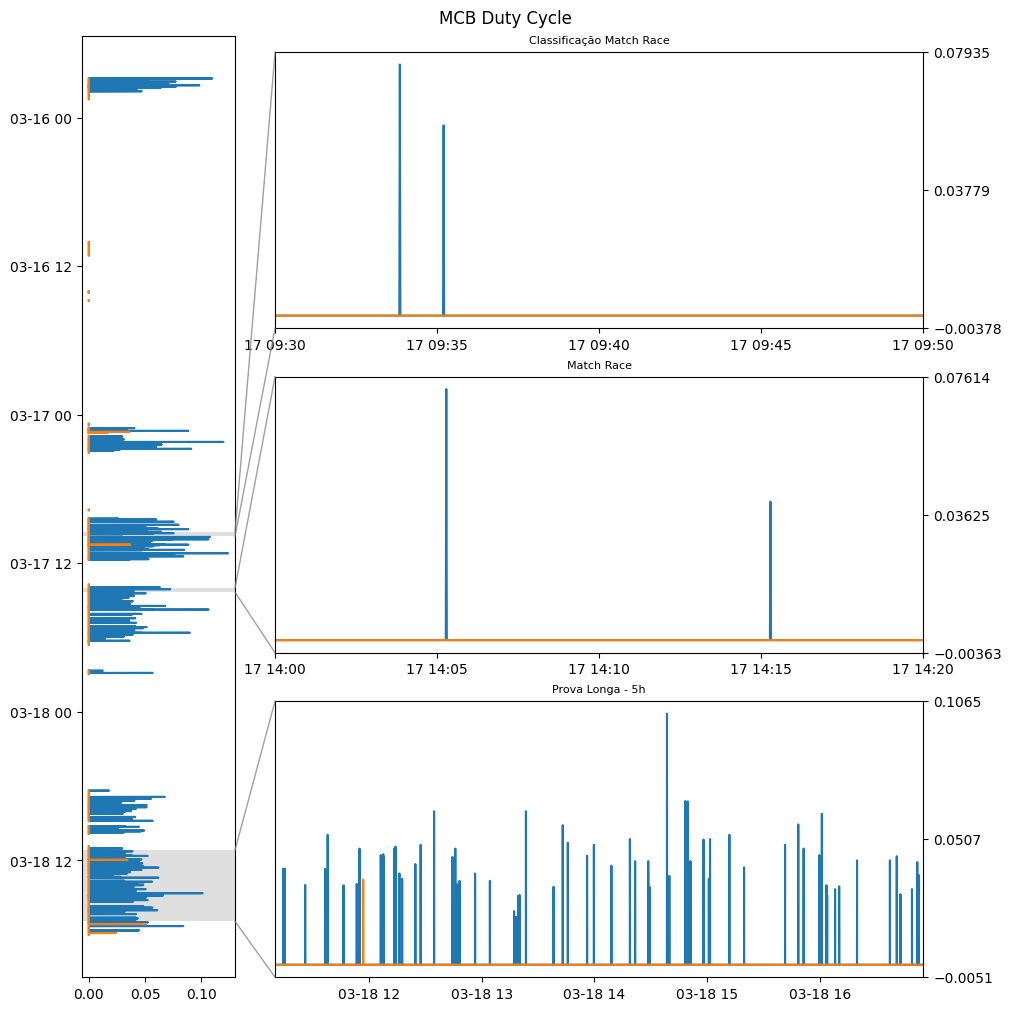

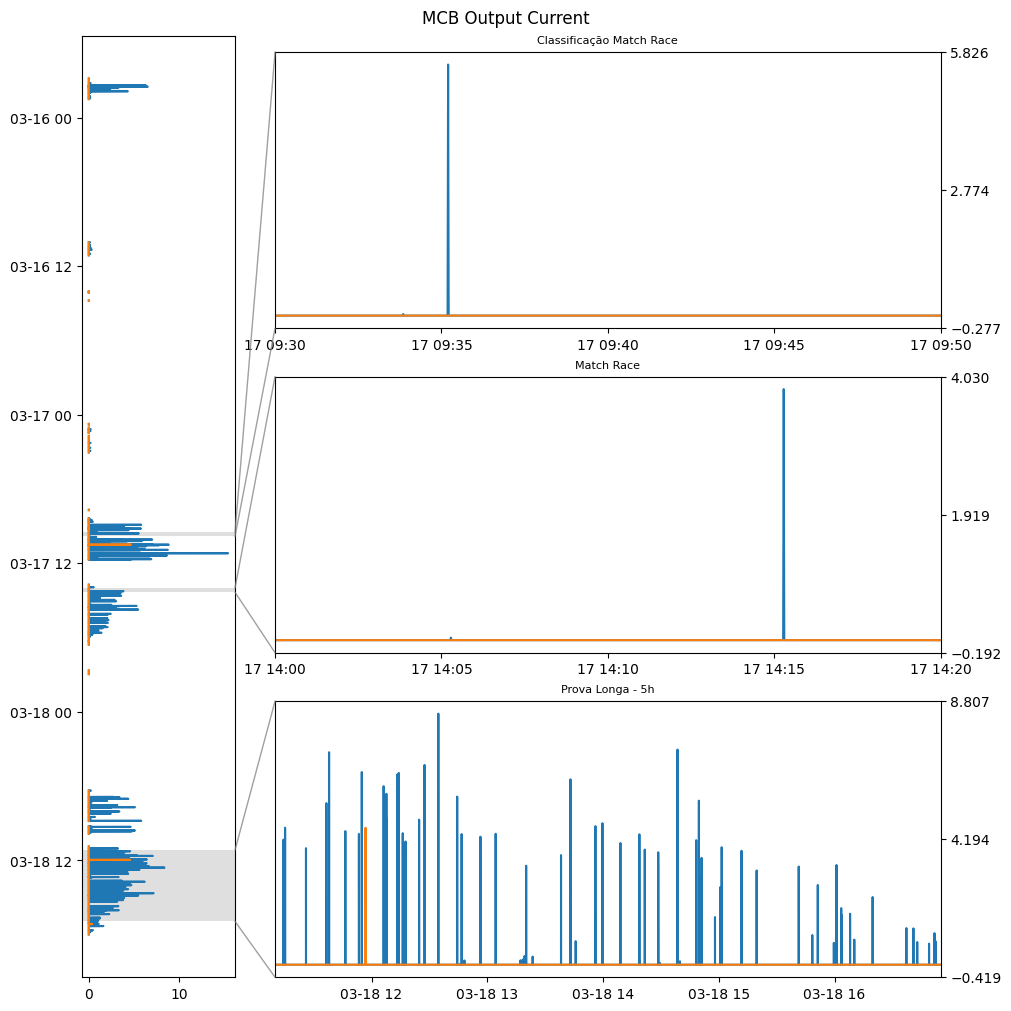

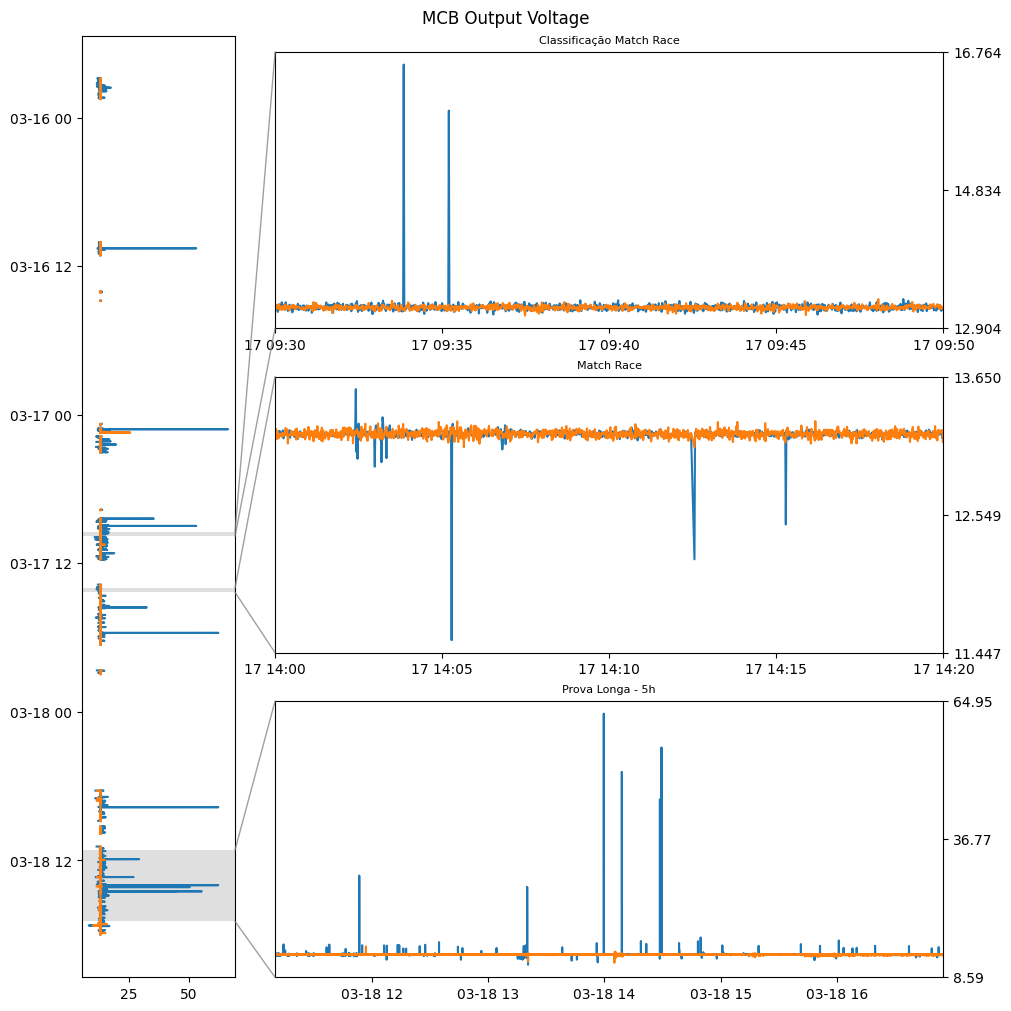

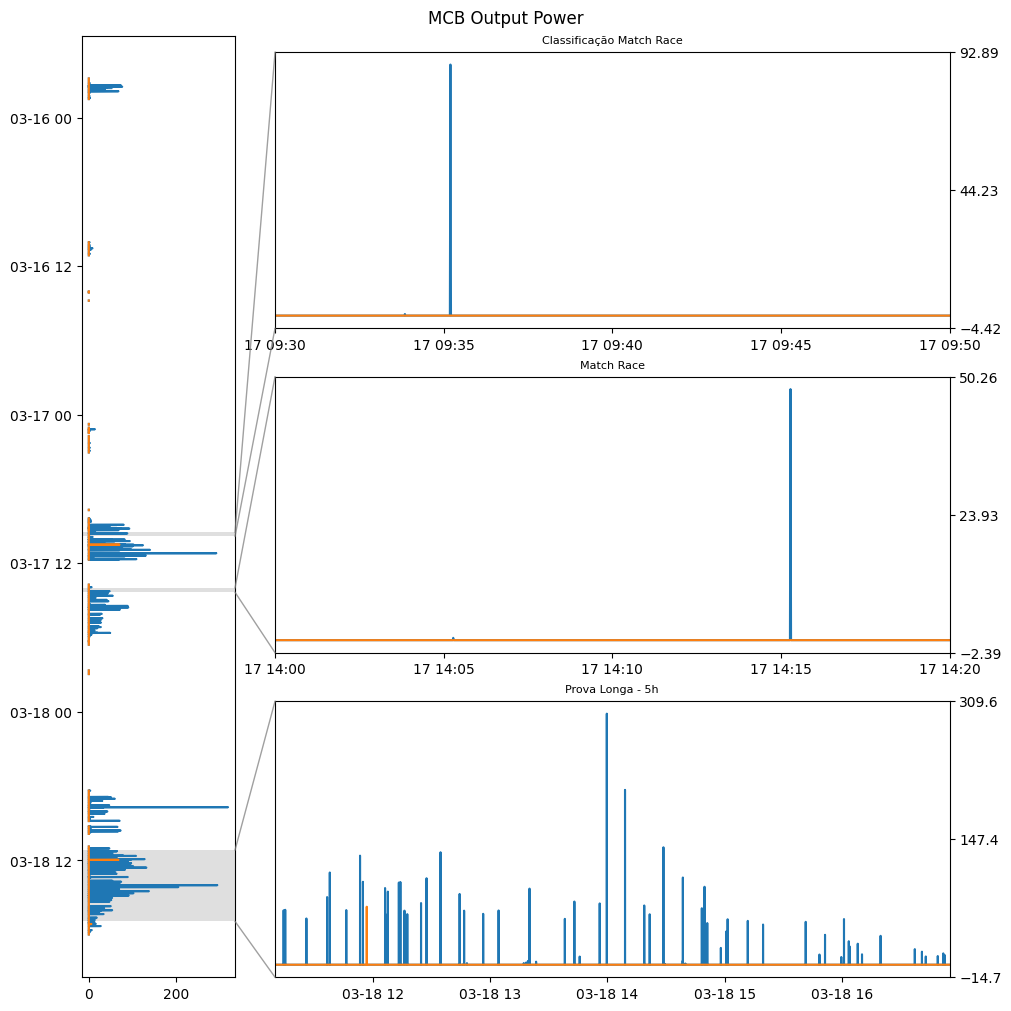

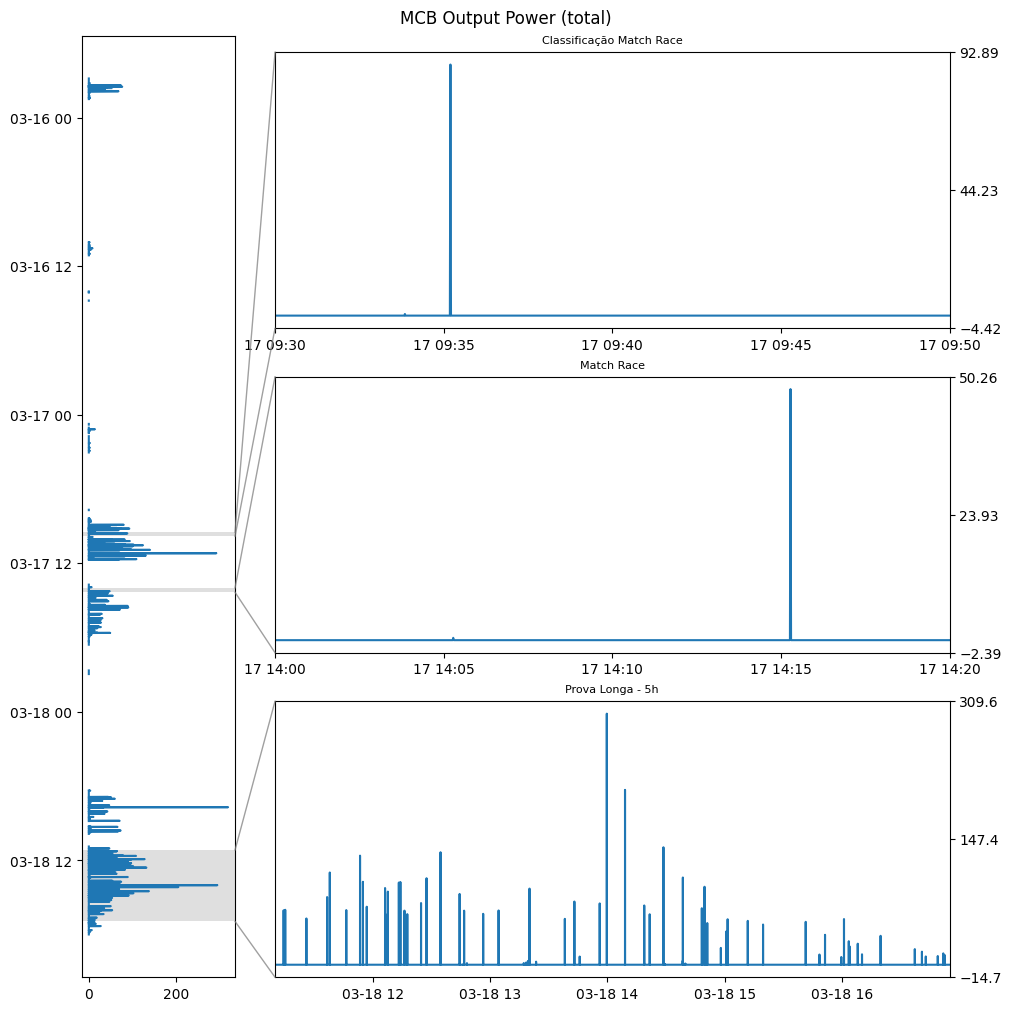

In [13]:
def solve_mcbs(df):
    df["mcb_po"] = np.zeros(len(df))
    for i in range(len(system_data["MCB Output Voltage"])):
        df[f"mcb{i + 1}_v_in"] = df[system_data["MCB Input Voltage"][i]]
        df[f"mcb{i + 1}_v_out"] = df[system_data["MCB Output Voltage"][i]]
        df[f"mcb{i + 1}_i_out"] = df[system_data["MCB Output Current"][i]]
        df[f"mcb{i + 1}_dt"] = df[system_data["MCB Duty Cycle"][i]]

        df[f"mcb{i + 1}_p_out"] = df[f"mcb{i + 1}_i_out"] * df[f"mcb{i + 1}_v_out"]

        df["mcb_po"] = df["mcb_po"] + df[f"mcb{i + 1}_p_out"]
    return df


solve_mcbs(df)

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_vi", "mcb2_vi"],
    "MCB Input Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_dt", "mcb2_dt"],
    "MCB Duty Cycle",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_io", "mcb2_io"],
    "MCB Output Current",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_vo", "mcb2_vo"],
    "MCB Output Voltage",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb1_po", "mcb2_po"],
    "MCB Output Power",
)
plt.show()

plot_events_data(
    plt.figure(figsize=(10, 10), constrained_layout=True),
    events,
    df,
    ["mcb_po"],
    "MCB Output Power (total)",
)
plt.show()


## Remove raw data columns


In [14]:
cols_to_keep = [
    # "batt_ii", UNAVAILABLE
    "batt_io",
    # "batt_pi",
    "batt_po",
    "batt_v",
    "bat1_v",
    "bat2_v",
    "bat3_v",
    "boat_on",
    "dms_on",
    "esc_dt",
    # "esc_i_in",
    # "esc_p_in",
    # "esc_p_out",
    "esc_vi",
    # "esc_vo", TODO
    "mcb_po",
    "mcb1_dt",
    "mcb1_io",
    "mcb1_po",
    "mcb1_vi",
    "mcb1_vo",
    "mcb2_dt",
    "mcb2_io",
    "mcb2_po",
    "mcb2_vi",
    "mcb2_vo",
    # "motor_ii", TODO
    "motor_on",
    # "motor_p_in",
    # "motor_p_out",
    "motor_rpm",
    # "motor_torq",
    # "motor_vi", TODO
    "mppt_i_out",
    "mppt_p_in",
    "mppt_p_out",
    "mppt_v_out",
    "mppt1_dt",
    "mppt1_ii",
    # "mppt1_io", TODO
    "mppt1_pi",
    # "mppt1_po", TODO
    "mppt1_vi",
    "mppt1_vo",
    "mppt2_dt",
    "mppt2_ii",
    # "mppt2_io", TODO
    "mppt2_pi",
    # "mppt2_po", TODO
    "mppt2_vi",
    "mppt2_vo",
    "mppt3_dt",
    "mppt3_ii",
    # "mppt3_io", TODO
    "mppt3_pi",
    # "mppt3_po", TODO
    "mppt3_vi",
    "mppt3_vo",
    "mppt4_dt",
    "mppt4_ii",
    # "mppt4_io", TODO
    "mppt4_pi",
    # "mppt4_po", TODO
    "mppt4_vi",
    "mppt4_vo",
    # "prop_p_in",
    # "prop_p_out", TODO
    "prop_rpm",
    # "prop_torq",
    "solcast_AirTemp",
    "solcast_energy",
    "solcast_poa",
    "timestamp",
    # "trans_p_in",
    # "trans_p_out",
    "trans_rpmi",
    "trans_rpmo",
    # "trans_torqi",
    # "trans_torqo",
    "gps_latitude",
    "gps_longitude",
    "gps_altitude",
    "gps_speed",
    "gps_heading",
    "gps_distance",
    "gps_timestamp",
]
df = df[cols_to_keep]

df.to_csv("models/2022/boat_data_1s.csv")


## Statistics


In [15]:
for event in events:
    df_sel = df[(df["timestamp"] >= event["start"]) & (df["timestamp"] <= event["end"])]

    print("-" * 80, end="\n\n")
    print("Event:", event["name"], end="\n\n")
    print(df_sel.describe().transpose()[["mean", "std", "min", "max"]])


--------------------------------------------------------------------------------

Event: Classificação Match Race

                        mean         std          min          max
batt_io              0.509139    1.600790     0.000000    13.989955
batt_po             19.479235   61.042595     0.000000   526.262756
batt_v              42.053776    2.576396    37.562500    52.379688
bat1_v             14.497355    1.359829    12.677734    17.062500
bat2_v             14.123844    1.449383    12.195312    16.647322
bat3_v             13.432581    1.624547     9.056250    19.051563
esc_dt              0.248888    0.162509     0.000000     0.498047
esc_vi             42.053776    2.576396    37.562500    52.379688
mcb_po              0.074136    2.552751     0.000000    88.465363
mcb1_dt             0.000111    0.002735     0.000000     0.075575
mcb1_io             0.004648    0.160101     0.000000     5.548295
mcb1_po             0.074136    2.552751     0.000000    88.465363
mcb1_vi    

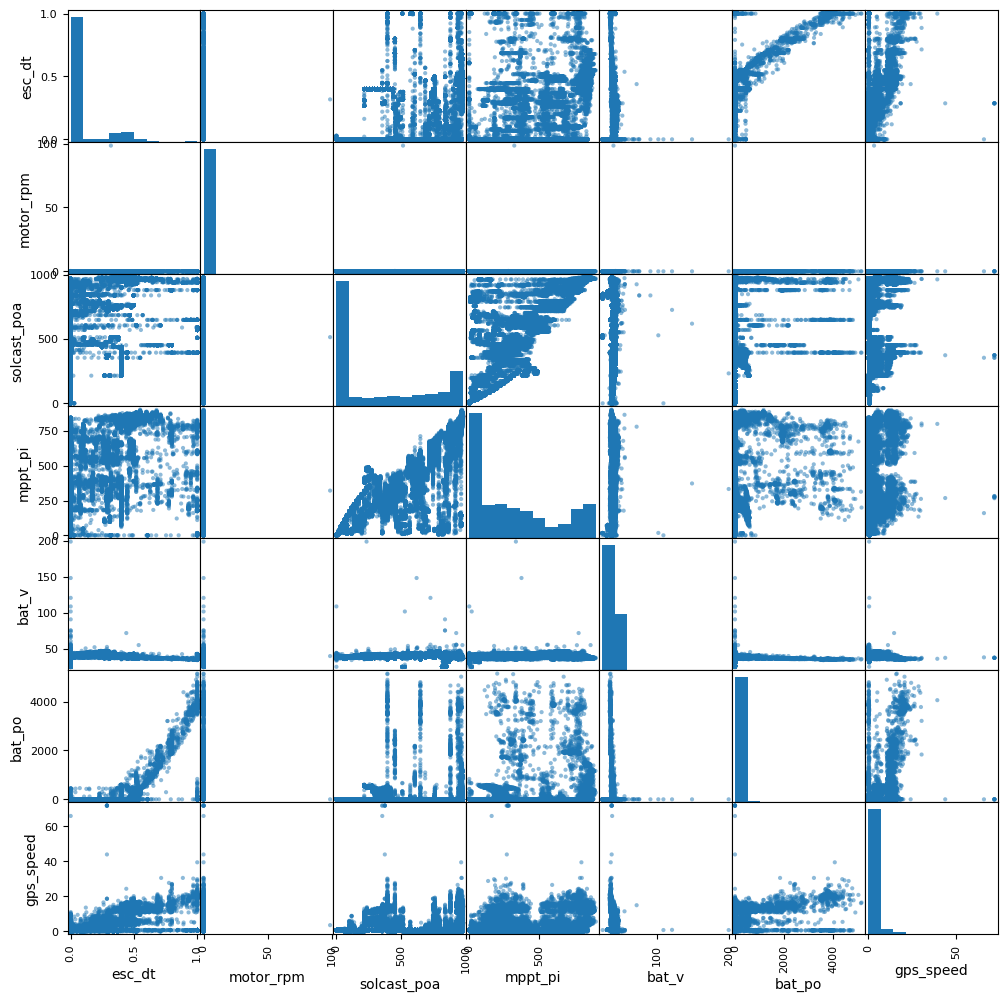

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    df[
        [
            "esc_dt",
            "motor_rpm",
            "solcast_poa",
            "mppt_p_in",
            "batt_v",
            "batt_po",
            "gps_speed",
        ]
    ],
    figsize=(12, 12),
)
plt.show()


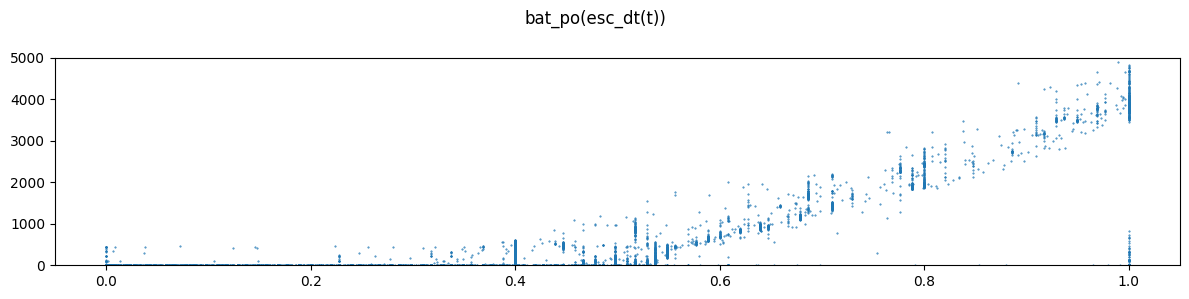

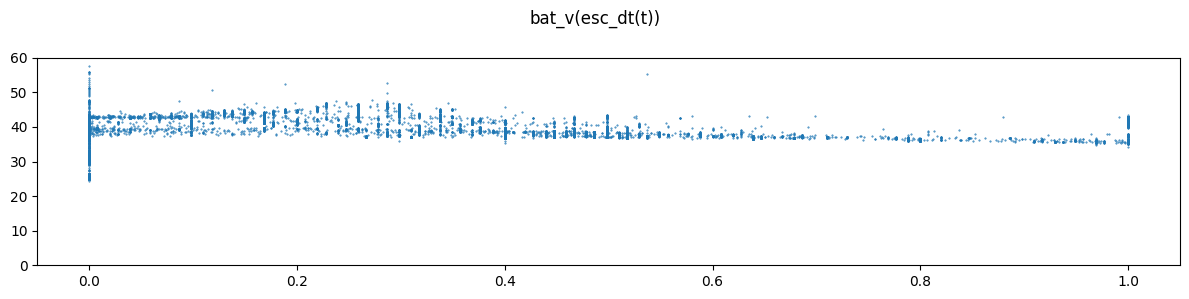

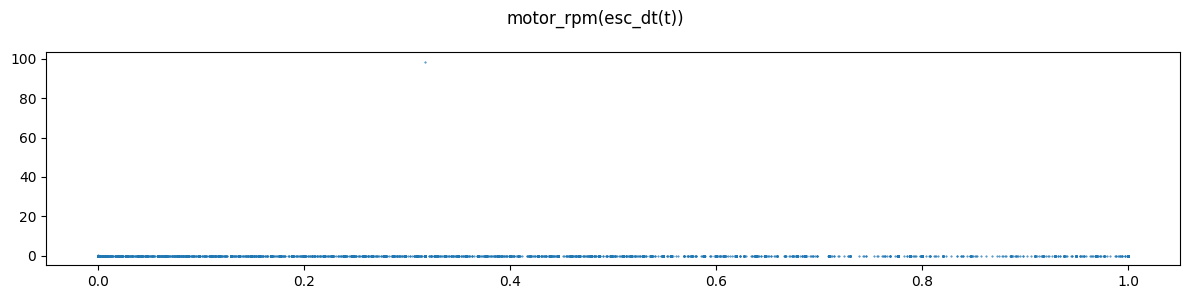

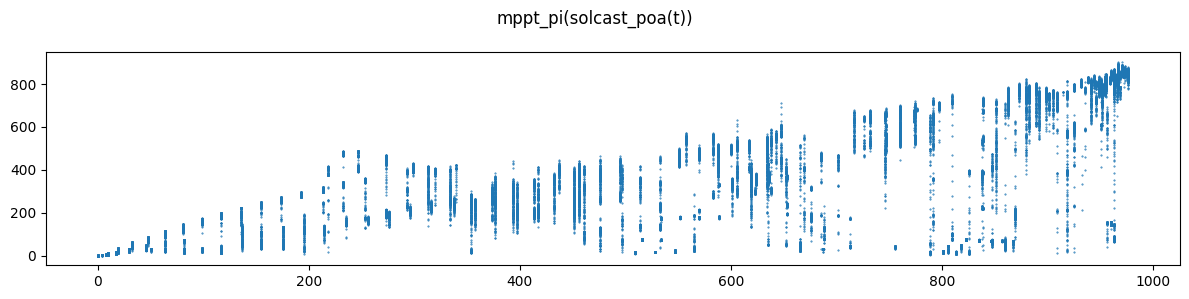

In [17]:
plt.figure(figsize=(12, 3))
plt.suptitle("batt_po(esc_dt(t))")
plt.scatter(df["esc_dt"], df["batt_po"], s=0.2)
plt.ylim([0, 5000])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("batt_v(esc_dt(t))")
plt.scatter(df["esc_dt"], df["batt_v"], s=0.2)
plt.ylim([0, 60])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("motor_rpm(esc_dt(t))")
plt.scatter(df["esc_dt"], df["motor_rpm"], s=0.2)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12, 3))
# plt.suptitle("prop_p_in(esc_p_in(t)) (modelled data)")
# plt.scatter(df["esc_p_in"], df["prop_p_in"], s=0.2)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("mppt_p_in(solcast_poa(t))")
plt.scatter(df["solcast_poa"], df["mppt_p_in"], s=0.2)
plt.tight_layout()
plt.show()


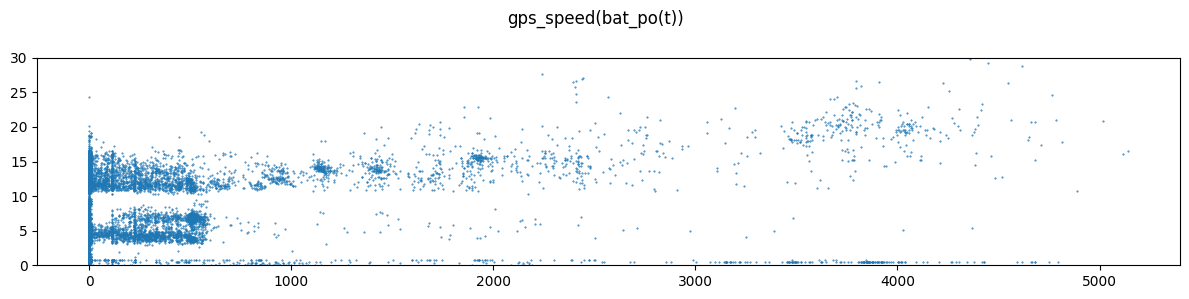

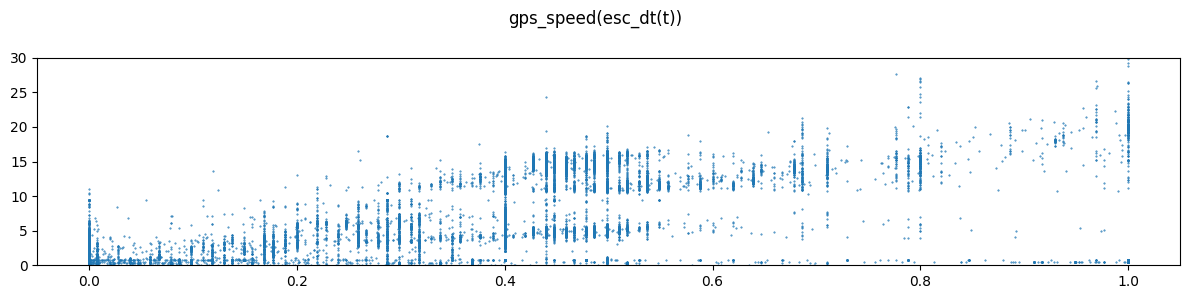

KeyError: 'esc_i_in'

<Figure size 1200x300 with 0 Axes>

In [18]:
plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(batt_po(t))")
plt.scatter(df["batt_po"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(esc_dt(t))")
plt.scatter(df["esc_dt"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()


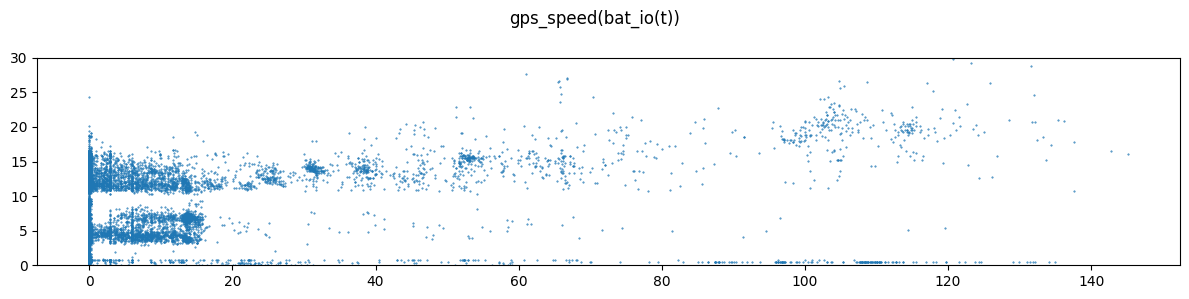

In [25]:

plt.figure(figsize=(12, 3))
plt.suptitle("gps_speed(batt_io(t))")
plt.scatter(df["batt_io"], df["gps_speed"], s=0.2)
plt.ylim([0, 30])
plt.tight_layout()
plt.show()

